In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'
file_rice = 'rice.png'
file_woman = 'woman.png'

In [3]:
def print_images(list_of_images, size = 20):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(size,size))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img, cmap='Greys_r');
        
def sharpen_img(image, blur):
    return image + (image - blur)

# Q.2 Edge Detection

In [4]:
def plot_edges(img, threshold, title_to_add = ""):
    # Using cv2.CV_64F datatype 
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)

    max_val_sobel = np.amax(sobel)
    to_print = []
    for thr in threshold:
        thr_val = thr
        if thr < 1: # means percentage
            thr_val = int(max_val_sobel * thr)

        # Apply threshold and save it ready to print
        to_print.append((cv2.threshold(sobel, thr_val, max_val_sobel, cv2.THRESH_BINARY)[1],
                         "Sobel Edge Detector\n %swith Threshold of %s" % (title_to_add, thr)))

    # Plot supperposed filters
    print_images(to_print, 12)

## Q.2.2 Laplacian of Gaussian

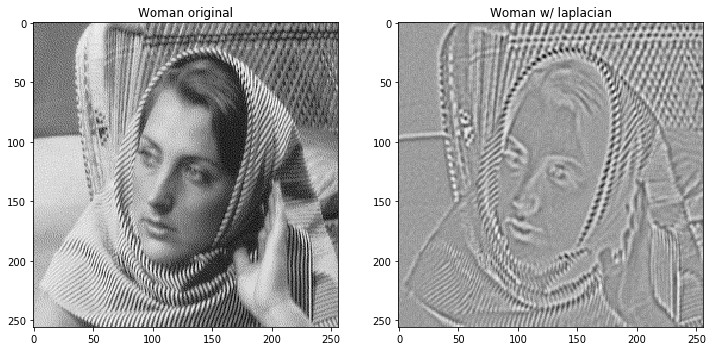

In [6]:
img_woman = cv2.imread(data_path + file_woman, cv2.COLOR_BGR2GRAY)

img_woman_filter_gaussian = cv2.GaussianBlur(img_woman, ksize = (5,5), sigmaX = np.sqrt(2))
laplacian_woman = cv2.Laplacian(img_woman_filter_gaussian, cv2.CV_64F)

# Ploting images
print_images([(img_woman, 'Woman original'),
              (laplacian_woman, 'Woman w/ laplacian')], 12)